## Concepts covered: 

1. Data pre-processing
2. Model building qith stats models (OLS)
3. Model building with Sklearn
4. Cross validation, Bias variance trade off
5. Feature Selection (SFS, BE, RFE)
6. Hyper parameter Tuning (Grid searchCV, Randomized Serach CV, Hyper opt)
7. Optimization (Stochastic gradient descent)

In [222]:
#! pip install mlxtend
#! pip install optuna

In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy.stats import boxcox 

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,SGDRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.model_selection import KFold,cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.metrics import r2_score, mean_squared_error

import optuna 
import optuna.trial._state

The Indian Premier League was a professional league for Twenty20 (T20) cricket championships (see Exhibit 1) that was started in 2008 in India. The IPL was initiated by the BCCI with eight franchises comprising players from across the world. The first IPL auction was held in 2008 for ownership of the teams for 10 years, with a base price of USD 50 million. The franchises acquire players through an English auction that is conducted every year. However, there are several rules imposed by the IPL. For example, only international players and popular Indian players are auctioned. The performance of the players could be measured through several metrics. Although the IPL follows the Twenty20 format of the game, it is possible that the performance of the players in the other formats of the game such as Test and One- Day matches could influence player pricing. A few players had excellent records in Test matches, but their records in Twenty20 matches were not very impressive. The performance of 130 players who played in at least one season of the IPL(2008-2011) measured through various performance metrics are provided in the dataset.

## About the dataset (IPL Auction data)

**PLAYER NAME**: Name of the player<br>
**AGE**: The age of the player is classified into three categories. Category 1 means the player is less than 25 years old. Category 2 means the player is between 25 and 35 years and Category 3 means the player has aged more than 35.<br>
**COUNTRY**: Country of the player<br>
**PLAYING ROLE**: Player's primary skill<br>
**T-RUNS**: Total runs scored in the test matches<br>
**T-WKTS**: Total wickets taken in the test matches<br>
**ODI-RUNS-S**: Runs scored in One Day Internationals<br>
**ODI-SR-B**: Batting strike rate in One Day Internationals<br>
**ODI-WKTS**: Wickets taken in One Day Internationals<br>
**ODI-SR-BL**: Bowling strike rate in One Day Internationals<br>
**CAPTAINCY EXP**: Captained a team or not<br>
**RUNS-S**: Number of runs scored by a player<br>
**HS**: Highest score by a batsman in IPL<br>
**AVE**: Average runs scored by a batsman in IPL<br>
**SR-B**: Batting strike rate (ratio of the number of runs scored to the number of basses faced) in IPL.<br>
**SIXERS**: Number of six runs scored by a player in IPL.<br>
**RUNS-C**: Number of runs conceded by a player<br>
**WKTS**: Number of wickets were taken by a player in IPL.<br>
**AVE-BL**: Bowling average (number of runs conceded / number of wickets taken) in IPL.<br>
**ECON**: Economy rate of a bowler in IPL (number of runs conceded by the bowler per over).<br>
**SR-BL**: Bowling strike rate (ratio of the number of balls bowled to the number of wickets taken) in IPL.<br>
**SOLD PRICE**: Auction price of the player (Target Variable)<br>

In [269]:
data=pd.read_csv('IPL_IMB_data.csv')
data.head()

PLAYER NAME  AGE COUNTRY PLAYING ROLE  T-RUNS  T-WKTS  ODI-RUNS-S  \
0   Abdulla, YA    2      SA   Allrounder       0       0           0   
1  Abdur Razzak    2     BAN       Bowler     214      18         657   
2   Agarkar, AB    2     IND       Bowler     571      58        1269   
3     Ashwin, R    1     IND       Bowler     284      31         241   
4  Badrinath, S    2     IND      Batsman      63       0          79   

   ODI-SR-B  ODI-WKTS  ODI-SR-BL  ...  HS    AVE    SR-B  SIXERS  RUNS-C  \
0      0.00         0        0.0  ...   0   0.00    0.00       0     307   
1     71.41       185       37.6  ...   0   0.00    0.00       0      29   
2     80.62       288       32.9  ...  39  18.56  121.01       5    1059   
3     84.56        51       36.8  ...  11   5.80   76.32       0    1125   
4     45.93         0        0.0  ...  71  32.93  120.71      28       0   

   WKTS  AVE-BL   ECON  SR-BL  SOLD PRICE  
0    15   20.47   8.90  13.93       50000  
1     0    0.00  14.50   0.00       50000  
2    29   36.52   8.81  24.90      350000  
3    49   22.96   6.23  22.14      850000  
4     0    0.00   0.00   0.00      800000  

[5 rows x 22 columns]

In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PLAYER NAME    130 non-null    object 
 1   AGE            130 non-null    int64  
 2   COUNTRY        130 non-null    object 
 3   PLAYING ROLE   130 non-null    object 
 4   T-RUNS         130 non-null    int64  
 5   T-WKTS         130 non-null    int64  
 6   ODI-RUNS-S     130 non-null    int64  
 7   ODI-SR-B       130 non-null    float64
 8   ODI-WKTS       130 non-null    int64  
 9   ODI-SR-BL      130 non-null    float64
 10  CAPTAINCY EXP  130 non-null    int64  
 11  RUNS-S         130 non-null    int64  
 12  HS             130 non-null    int64  
 13  AVE            130 non-null    float64
 14  SR-B           130 non-null    float64
 15  SIXERS         130 non-null    int64  
 16  RUNS-C         130 non-null    int64  
 17  WKTS           130 non-null    int64  
 18  AVE-BL    

In [271]:
data.describe().T

count           mean            std      min          25%  \
AGE            130.0       2.092308       0.576627      1.0       2.0000   
T-RUNS         130.0    2166.715385    3305.646757      0.0      25.5000   
T-WKTS         130.0      66.530769     142.676855      0.0       0.0000   
ODI-RUNS-S     130.0    2508.738462    3582.205625      0.0      73.2500   
ODI-SR-B       130.0      71.164385      25.898440      0.0      65.6500   
ODI-WKTS       130.0      76.076923     111.205070      0.0       0.0000   
ODI-SR-BL      130.0      34.033846      26.751749      0.0       0.0000   
CAPTAINCY EXP  130.0       0.315385       0.466466      0.0       0.0000   
RUNS-S         130.0     514.246154     615.226335      0.0      39.0000   
HS             130.0      47.430769      36.403624      0.0      16.0000   
AVE            130.0      18.719308      11.094224      0.0       9.8250   
SR-B           130.0     111.053462      35.928907      0.0      98.2375   
SIXERS         130.0      17.692308      23.828146      0.0       1.0000   
RUNS-C         130.0     475.523077     558.314049      0.0       0.0000   
WKTS           130.0      17.169231      21.816763      0.0       0.0000   
AVE-BL         130.0      23.110231      20.802057      0.0       0.0000   
ECON           130.0       6.204462       4.941531      0.0       0.0000   
SR-BL          130.0      17.382615      15.273422      0.0       0.0000   
SOLD PRICE     130.0  521223.076923  406807.351419  20000.0  225000.0000   

                      50%          75%         max  
AGE                 2.000       2.0000        3.00  
T-RUNS            542.500    3002.2500    15470.00  
T-WKTS              7.000      47.5000      800.00  
ODI-RUNS-S        835.000    3523.5000    18426.00  
ODI-SR-B           78.225      86.7900      116.66  
ODI-WKTS           18.500     106.0000      534.00  
ODI-SR-BL          36.600      45.3250      150.00  
CAPTAINCY EXP       0.000       1.0000        1.00  
RUNS-S            172.000     925.2500     2254.00  
HS                 35.500      73.7500      158.00  
AVE                18.635      27.8725       50.11  
SR-B              118.510     129.1025      235.49  
SIXERS              6.000      29.7500      129.00  
RUNS-C            297.000     689.2500     1975.00  
WKTS                8.500      23.7500       83.00  
AVE-BL             24.785      35.5800      126.30  
ECON                7.380       8.2475       38.11  
SR-BL              19.935      26.2125      100.20  
SOLD PRICE     437500.000  700000.0000  1800000.00

In [272]:
data.describe(include='object')

PLAYER NAME COUNTRY PLAYING ROLE
count          130     130          130
unique         130      10            4
top     Zoysa, DNT     IND       Bowler
freq             1      53           44

**Interpretation:** The variables `PLAYER NAME`, `COUNTRY` and `PLAYING ROLE` are categorical. All the remaining variables are numerical. 

From the above output, we see that the data type of `AGE` and `CAPTAINCY EXP` is 'int64'.

But according to the data definition, `AGE` and `CAPTAINCY EXP` are categorical variables, which are wrongly interpreted as 'int64', so we will convert these variables data type to 'object'.

In [273]:
data.AGE.value_counts()

AGE
2    86
3    28
1    16
Name: count, dtype: int64

In [274]:
data['CAPTAINCY EXP'].value_counts()

CAPTAINCY EXP
0    89
1    41
Name: count, dtype: int64

In [275]:
data['PLAYER NAME'].nunique()

130

In [276]:
data.drop('PLAYER NAME',axis=1,inplace=True)

In [277]:
data['AGE']=data['AGE'].astype('object')
data['CAPTAINCY EXP']=data['CAPTAINCY EXP'].astype('object')

In [278]:
target=data['SOLD PRICE']

In [279]:
num=data.select_dtypes(include=np.number)
cat=data.select_dtypes(include='object')

In [280]:
cat.drop('COUNTRY',axis=1, inplace=True)

In [281]:
#Category encoding
dummy=pd.get_dummies(data=cat,drop_first=True,dtype=float)


In [282]:
dummy

AGE_2  AGE_3  PLAYING ROLE_Batsman  PLAYING ROLE_Bowler  \
0      1.0    0.0                   0.0                  0.0   
1      1.0    0.0                   0.0                  1.0   
2      1.0    0.0                   0.0                  1.0   
3      0.0    0.0                   0.0                  1.0   
4      1.0    0.0                   1.0                  0.0   
..     ...    ...                   ...                  ...   
125    1.0    0.0                   1.0                  0.0   
126    1.0    0.0                   1.0                  0.0   
127    1.0    0.0                   1.0                  0.0   
128    1.0    0.0                   0.0                  1.0   
129    1.0    0.0                   0.0                  1.0   

     PLAYING ROLE_W. Keeper  CAPTAINCY EXP_1  
0                       0.0              0.0  
1                       0.0              0.0  
2                       0.0              0.0  
3                       0.0              0.0  
4                       0.0              0.0  
..                      ...              ...  
125                     0.0              0.0  
126                     0.0              1.0  
127                     0.0              1.0  
128                     0.0              0.0  
129                     0.0              0.0  

[130 rows x 6 columns]

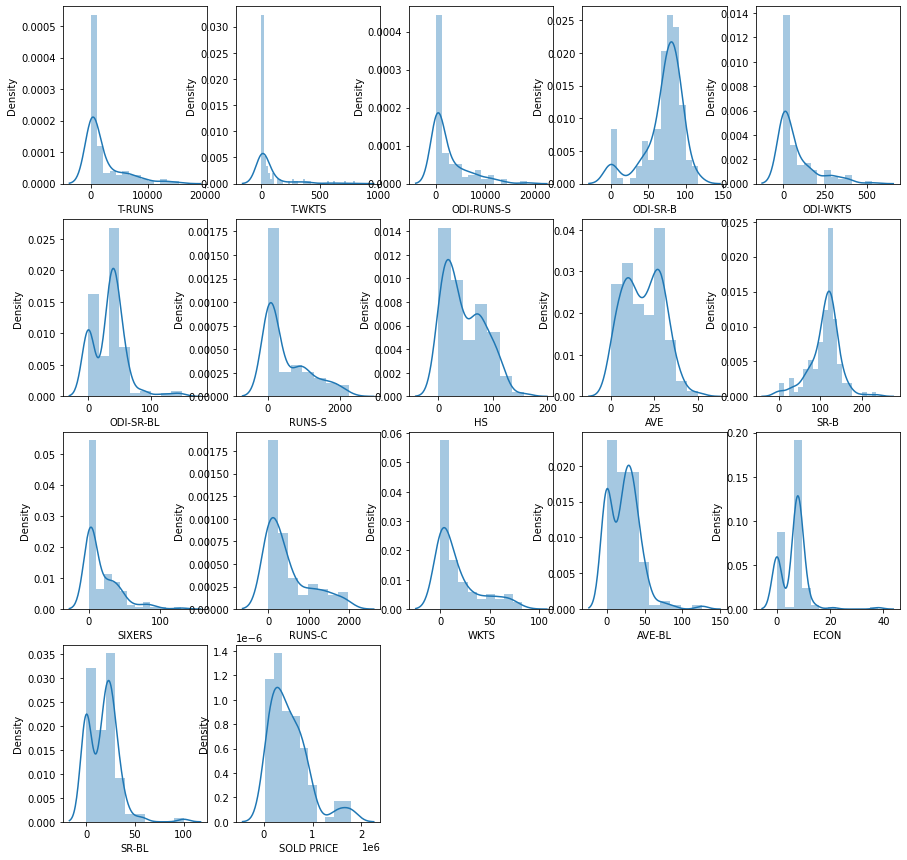

In [283]:
plt.figure(figsize=[15,15])
i=1
for col in num:
    ax=plt.subplot(4,5,i)
    sns.distplot(num[col])
    i=i+1

In [284]:
num.skew()

T-RUNS        1.928024
T-WKTS        3.104904
ODI-RUNS-S    1.874177
ODI-SR-B     -1.438180
ODI-WKTS      1.797747
ODI-SR-BL     1.060627
RUNS-S        1.123952
HS            0.586836
AVE           0.147521
SR-B         -0.589874
SIXERS        1.889971
RUNS-C        1.195525
WKTS          1.376290
AVE-BL        1.203221
ECON          1.918096
SR-BL         1.294332
SOLD PRICE    1.376956
dtype: float64

In [286]:
# Skew treatment

In [266]:
#pt=PowerTransformer()
#pt_sc=pd.DataFrame(pt.fit_transform(num),columns=num.columns)
#pt_sc.skew()

In [287]:
# Capping
for i in num.columns:
    Q1=num[i].quantile(.25)
    Q3=num[i].quantile(.75)
    IQR=Q3-Q1
    ub=Q3+1.5*IQR
    lb=Q1-1.5*IQR
    lc=num[i].quantile(.18)
    uc=num[i].quantile(.82)
    for ind in num[i].index:
        if (num.loc[ind,i]>uc):
            num.loc[ind,i]=uc
        elif (num.loc[ind,i]<lc):
            num.loc[ind,i]=lc   

In [ ]:
num.skew()

<Axes: >

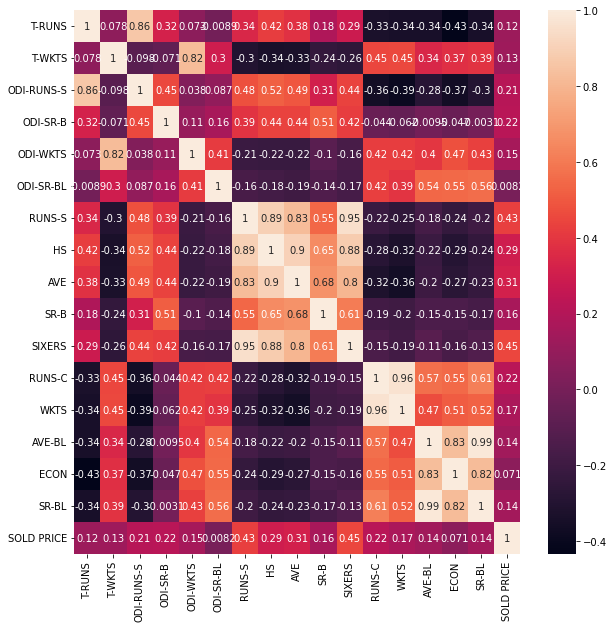

In [288]:
#num-num
plt.figure(figsize=[10,10])
sns.heatmap(num.corr(),annot=True)

In [149]:
#sns.pairplot(num, kind='kde')

In [289]:
# scaling
sc=StandardScaler()
num_sc=pd.DataFrame(sc.fit_transform(num),columns=num.columns)
num_sc.head()

T-RUNS    T-WKTS  ODI-RUNS-S  ODI-SR-B  ODI-WKTS  ODI-SR-BL    RUNS-S  \
0 -0.831495 -0.769335   -0.874789 -1.568063 -0.868424  -1.594857 -0.909194   
1 -0.713637 -0.278163   -0.573090 -0.327124  1.647819   0.412782 -0.909194   
2 -0.517022  0.813330   -0.272266  0.432201  1.647819   0.161827 -0.591685   
3 -0.675085  0.076572   -0.777572  0.757037 -0.043479   0.370066 -0.846571   
4 -0.796798 -0.769335   -0.857202 -1.568063 -0.868424  -1.594857  1.509517   

         HS       AVE      SR-B    SIXERS    RUNS-C      WKTS    AVE-BL  \
0 -1.166991 -1.262940 -1.652704 -0.931730 -0.213242  0.130089  0.008451   
1 -1.166991 -1.262940 -1.652704 -0.931730 -0.919427 -0.953990 -1.340818   
2 -0.208697  0.002495  0.458376 -0.593339  1.615829  1.141897  1.066379   
3 -1.166991 -1.262940 -1.652704 -0.931730  1.615829  1.647800  0.172578   
4  0.886496  1.208268  0.442518  0.963258 -0.993094 -0.953990 -1.340818   

       ECON     SR-BL  SOLD PRICE  
0  0.880556 -0.141478   -1.257279  
1  0.880556 -1.366865   -1.257279  
2  0.878373  0.823525   -0.455189  
3  0.156127  0.580735    1.369586  
4 -1.587902 -1.366865    1.369586

In [290]:
data_final=pd.concat([num_sc,dummy], axis=1)
data_final.head()

T-RUNS    T-WKTS  ODI-RUNS-S  ODI-SR-B  ODI-WKTS  ODI-SR-BL    RUNS-S  \
0 -0.831495 -0.769335   -0.874789 -1.568063 -0.868424  -1.594857 -0.909194   
1 -0.713637 -0.278163   -0.573090 -0.327124  1.647819   0.412782 -0.909194   
2 -0.517022  0.813330   -0.272266  0.432201  1.647819   0.161827 -0.591685   
3 -0.675085  0.076572   -0.777572  0.757037 -0.043479   0.370066 -0.846571   
4 -0.796798 -0.769335   -0.857202 -1.568063 -0.868424  -1.594857  1.509517   

         HS       AVE      SR-B  ...    AVE-BL      ECON     SR-BL  \
0 -1.166991 -1.262940 -1.652704  ...  0.008451  0.880556 -0.141478   
1 -1.166991 -1.262940 -1.652704  ... -1.340818  0.880556 -1.366865   
2 -0.208697  0.002495  0.458376  ...  1.066379  0.878373  0.823525   
3 -1.166991 -1.262940 -1.652704  ...  0.172578  0.156127  0.580735   
4  0.886496  1.208268  0.442518  ... -1.340818 -1.587902 -1.366865   

   SOLD PRICE  AGE_2  AGE_3  PLAYING ROLE_Batsman  PLAYING ROLE_Bowler  \
0   -1.257279    1.0    0.0                   0.0                  0.0   
1   -1.257279    1.0    0.0                   0.0                  1.0   
2   -0.455189    1.0    0.0                   0.0                  1.0   
3    1.369586    0.0    0.0                   0.0                  1.0   
4    1.369586    1.0    0.0                   1.0                  0.0   

   PLAYING ROLE_W. Keeper  CAPTAINCY EXP_1  
0                     0.0              0.0  
1                     0.0              0.0  
2                     0.0              0.0  
3                     0.0              0.0  
4                     0.0              0.0  

[5 rows x 23 columns]

In [291]:
y=data_final['SOLD PRICE']
X=data_final.drop('SOLD PRICE', axis=1)

In [292]:
#OLS
X_c=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X_c,y,test_size=.2,random_state=10)
X_train.shape

(104, 23)

In [293]:
# Model building 
model1= sm.OLS(y_train,X_train).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:             SOLD PRICE   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     4.628
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.94e-07
Time:                        11:10:35   Log-Likelihood:                -104.90
No. Observations:                 104   AIC:                             255.8
Df Residuals:                      81   BIC:                             316.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [294]:
model1.resid.skew()

0.22461589463700507

<Axes: >

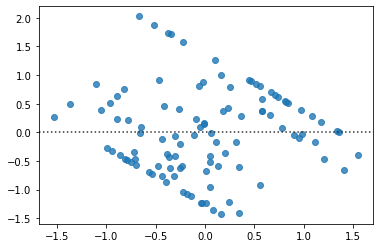

In [295]:
sns.residplot(x=model1.resid,y=model1.fittedvalues)

In [155]:
X_test.shape

(26, 23)

In [156]:
model1.rsquared

0.5508032460312672

In [157]:
y_pred=model1.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.0081373886736988

In [158]:
#a lot of insignificant variables (pvalues>.05)
# Assumptions:
   # Multicolinearity is present
   # Some amount of heteroscadasticity is present
   # No Auto-correlation

In [159]:
#VIF for multicolinearity <5

vif_val=[vif(X.values,i)for i in range(0,X.shape[1])]
VIF=pd.DataFrame()
VIF['feat']=X.columns
VIF['vif']=vif_val

VIF.sort_values('vif',ascending=False)



feat        vif
13                  AVE-BL  64.266189
15                   SR-BL  63.419431
11                  RUNS-C  24.121200
12                    WKTS  22.929250
6                   RUNS-S  19.289434
10                  SIXERS  17.311150
7                       HS  11.616462
2               ODI-RUNS-S   7.851065
0                   T-RUNS   7.638712
8                      AVE   6.898948
1                   T-WKTS   5.540653
4                 ODI-WKTS   5.502836
14                    ECON   5.437997
18    PLAYING ROLE_Batsman   5.020938
19     PLAYING ROLE_Bowler   4.445212
21         CAPTAINCY EXP_1   4.050973
16                   AGE_2   3.532716
20  PLAYING ROLE_W. Keeper   3.340575
9                     SR-B   2.593996
17                   AGE_3   2.495499
5                ODI-SR-BL   2.382245
3                 ODI-SR-B   1.771862

In [160]:
X=X.drop('AVE-BL',axis=1)

vif_val=[vif(X.values,i)for i in range(0,X.shape[1])]
VIF=pd.DataFrame()
VIF['feat']=X.columns
VIF['vif']=vif_val

VIF.sort_values('vif',ascending=False)

feat        vif
11                  RUNS-C  22.816588
12                    WKTS  20.517583
6                   RUNS-S  19.195930
10                  SIXERS  17.257537
7                       HS  11.615082
2               ODI-RUNS-S   7.827436
0                   T-RUNS   7.581815
8                      AVE   6.878781
1                   T-WKTS   5.538636
4                 ODI-WKTS   5.449165
14                   SR-BL   5.146788
17    PLAYING ROLE_Batsman   5.020929
13                    ECON   4.770715
18     PLAYING ROLE_Bowler   4.401223
20         CAPTAINCY EXP_1   3.934325
15                   AGE_2   3.399070
19  PLAYING ROLE_W. Keeper   3.340120
9                     SR-B   2.590237
16                   AGE_3   2.495424
5                ODI-SR-BL   2.378322
3                 ODI-SR-B   1.755195

In [161]:
X=X.drop('RUNS-C',axis=1)

vif_val=[vif(X.values,i)for i in range(0,X.shape[1])]
VIF=pd.DataFrame()
VIF['feat']=X.columns
VIF['vif']=vif_val

VIF.sort_values('vif',ascending=False)

feat        vif
6                   RUNS-S  19.195927
10                  SIXERS  17.227504
7                       HS  11.305962
2               ODI-RUNS-S   7.740485
0                   T-RUNS   7.581379
8                      AVE   6.877383
1                   T-WKTS   5.538129
4                 ODI-WKTS   5.437160
16    PLAYING ROLE_Batsman   5.015128
12                    ECON   4.678516
17     PLAYING ROLE_Bowler   4.162894
13                   SR-BL   4.023574
19         CAPTAINCY EXP_1   3.934231
14                   AGE_2   3.367073
18  PLAYING ROLE_W. Keeper   3.340082
9                     SR-B   2.580856
5                ODI-SR-BL   2.373171
15                   AGE_3   2.336226
11                    WKTS   2.272006
3                 ODI-SR-B   1.753192

In [162]:
X=X.drop('RUNS-S',axis=1)

vif_val=[vif(X.values,i)for i in range(0,X.shape[1])]
VIF=pd.DataFrame()
VIF['feat']=X.columns
VIF['vif']=vif_val

VIF.sort_values('vif',ascending=False)

feat        vif
6                       HS  10.465166
2               ODI-RUNS-S   7.737706
0                   T-RUNS   7.576285
7                      AVE   6.694977
9                   SIXERS   5.704530
1                   T-WKTS   5.537237
4                 ODI-WKTS   5.424241
15    PLAYING ROLE_Batsman   5.013470
11                    ECON   4.677907
16     PLAYING ROLE_Bowler   4.152841
12                   SR-BL   3.979790
18         CAPTAINCY EXP_1   3.930982
13                   AGE_2   3.361615
17  PLAYING ROLE_W. Keeper   3.312744
14                   AGE_3   2.333498
5                ODI-SR-BL   2.299253
8                     SR-B   2.291393
10                    WKTS   2.269348
3                 ODI-SR-B   1.752715

In [163]:
X=X.drop('HS',axis=1)

vif_val=[vif(X.values,i)for i in range(0,X.shape[1])]
VIF=pd.DataFrame()
VIF['feat']=X.columns
VIF['vif']=vif_val

VIF.sort_values('vif',ascending=False)

feat       vif
2               ODI-RUNS-S  7.475257
0                   T-RUNS  7.273947
1                   T-WKTS  5.452667
4                 ODI-WKTS  5.401924
14    PLAYING ROLE_Batsman  5.009798
10                    ECON  4.628869
6                      AVE  4.368265
15     PLAYING ROLE_Bowler  4.031190
11                   SR-BL  3.977958
17         CAPTAINCY EXP_1  3.930114
8                   SIXERS  3.729544
12                   AGE_2  3.325520
16  PLAYING ROLE_W. Keeper  3.309492
13                   AGE_3  2.311138
7                     SR-B  2.281405
5                ODI-SR-BL  2.271227
9                     WKTS  2.268772
3                 ODI-SR-B  1.752711

In [164]:
X=X.drop('ODI-RUNS-S',axis=1)

vif_val=[vif(X.values,i)for i in range(0,X.shape[1])]
VIF=pd.DataFrame()
VIF['feat']=X.columns
VIF['vif']=vif_val

VIF.sort_values('vif',ascending=False)

feat       vif
1                   T-WKTS  4.946782
3                 ODI-WKTS  4.869751
13    PLAYING ROLE_Batsman  4.845721
9                     ECON  4.628614
5                      AVE  4.343603
10                   SR-BL  3.977187
0                   T-RUNS  3.968143
14     PLAYING ROLE_Bowler  3.935278
16         CAPTAINCY EXP_1  3.823197
7                   SIXERS  3.608484
11                   AGE_2  3.269999
15  PLAYING ROLE_W. Keeper  3.214258
6                     SR-B  2.274466
12                   AGE_3  2.252947
8                     WKTS  2.245394
4                ODI-SR-BL  2.084546
2                 ODI-SR-B  1.711053

In [165]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=10)

In [166]:
#sklearn
lr=LinearRegression()
model_lr=lr.fit(X_train,y_train)
y_pred1=model_lr.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred1))

0.9219641528683914

In [167]:
# kfold cross validation

kf=KFold(n_splits=5)
score=cross_val_score(lr,X_train,y_train,cv=kf,scoring='r2')
bias=1-score.mean()
var=score.std()/score.mean()
bias,var

(0.7955189848400189, 0.6419391242159365)

In [168]:
score

array([ 1.65772833e-01,  3.79367430e-01, -1.20708014e-04,  3.08925703e-01,
        1.68459818e-01])

In [169]:
# Feature selection
# Sequential feature selectors
   # Forward
   # Backward
   # RFE

In [1]:
# forward


In [2]:
# backward FE


In [3]:
# RFE


In [56]:
# Regularizations
   # Ridge
   # Lasso 
   # Elastic Net

In [184]:
# Hyper parameter optimization
   # Grid search
   # Random Search 
   # Bayesian Opt

In [4]:
# Grid search


In [5]:
#build the model with best params


In [6]:
# Randomized search


In [7]:
#build the model with best params


In [72]:
# Optimization
   # SGD